### Use Principle Component Analysis to reduce the high demension of data to 2 dimensional space for visualization
Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data (https://en.wikipedia.org/wiki/Principal_component_analysis). Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

### In this exercise, we will:
- load BBC news data into pandas dataframe
- encode text into tfidf vectors, the tfidf vectors represent high dimensional input variables
- use PCA to reduce the tfidf variable dimensions into just 2 main principle components
- visualize the tfidf variables in 2 dimensional space by plotting the 2 principle components
- show the data points with color to indicate which category the sample belongs to
- exam the plot and look for any pattens of the samples
- (optional) run KMeans cluster and plot again the data after PCA and indicate which cluster the sample belongs to
- (optional) see the different pattens between sample belongs to category vs. sample belongs to cluster label

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('kaggle_data/bbc-text.csv')
print(df.shape, df['category'].nunique())
df.head(2)

(2225, 2) 5


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...


In [3]:
vec = TfidfVectorizer()
encoded_x = vec.fit_transform(df['text'])
encoded_x.shape

(2225, 29421)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(encoded_x.toarray())
x_pca.shape

(2225, 2)

In [5]:
x_pca

array([[ 0.12227349, -0.12453594],
       [-0.03953239,  0.03566568],
       [ 0.02496507,  0.10597965],
       ...,
       [-0.07590965,  0.00232962],
       [ 0.15038664,  0.00538744],
       [ 0.02455394,  0.15838667]])

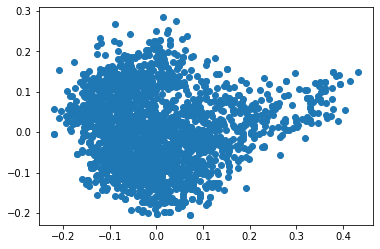

In [6]:
plt.scatter(x_pca[:, 0], x_pca[:, 1])

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_category = le.fit_transform(df['category'])
encoded_category
df['encoded_category'] = encoded_category

In [10]:
df.head()

,category,text,encoded_category
0,tech,tv future in the hands of viewers with home th...,4
1,business,worldcom boss left books alone former worldc...,0
2,sport,tigers wary of farrell gamble leicester say ...,3
3,sport,yeading face newcastle in fa cup premiership s...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1


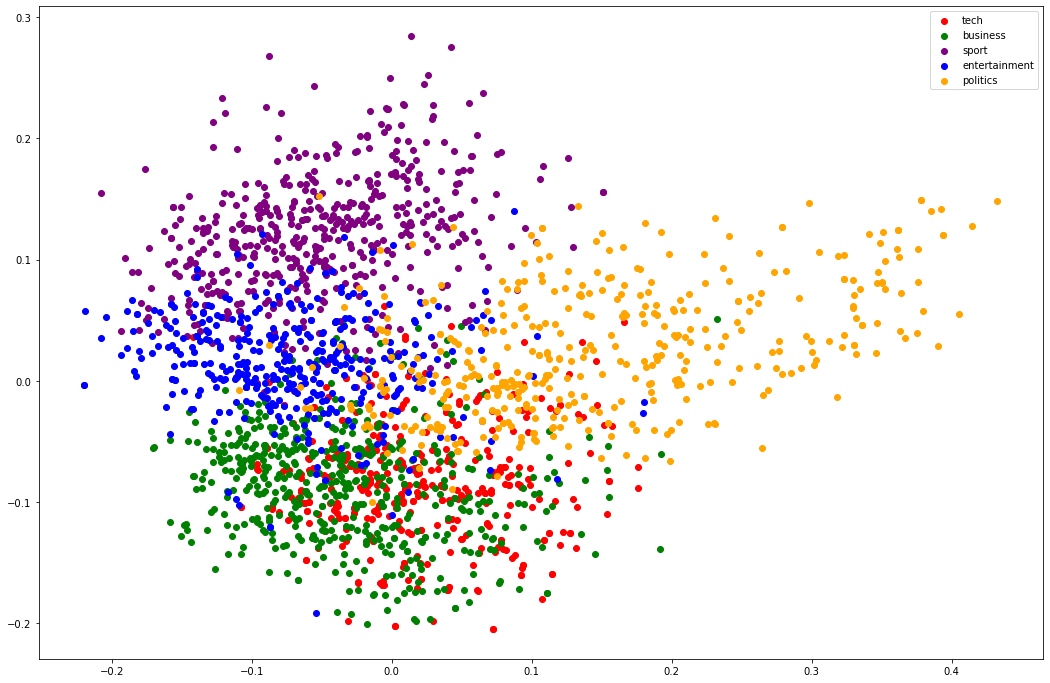

In [11]:
colors = ['green','blue', 'orange', 'purple', 'red']
plt.figure(figsize=(18, 12))
encoded_categories = df['encoded_category'].unique()
for e in encoded_categories:
	mark = df['encoded_category'] == e
	plt.scatter(x_pca[:, 0][mark], x_pca[:, 1][mark], color=colors[e], label=le.inverse_transform([e])[0])
plt.legend();

### Optional: run KMeans clustering and compare data points in category vs. sata points in cluster

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(5, n_init=20, random_state=42)
kmeans.fit(encoded_x)
kmeans.labels_

array([1, 4, 0, ..., 3, 1, 0], dtype=int32)

In [13]:
set(kmeans.labels_)

{0, 1, 2, 3, 4}

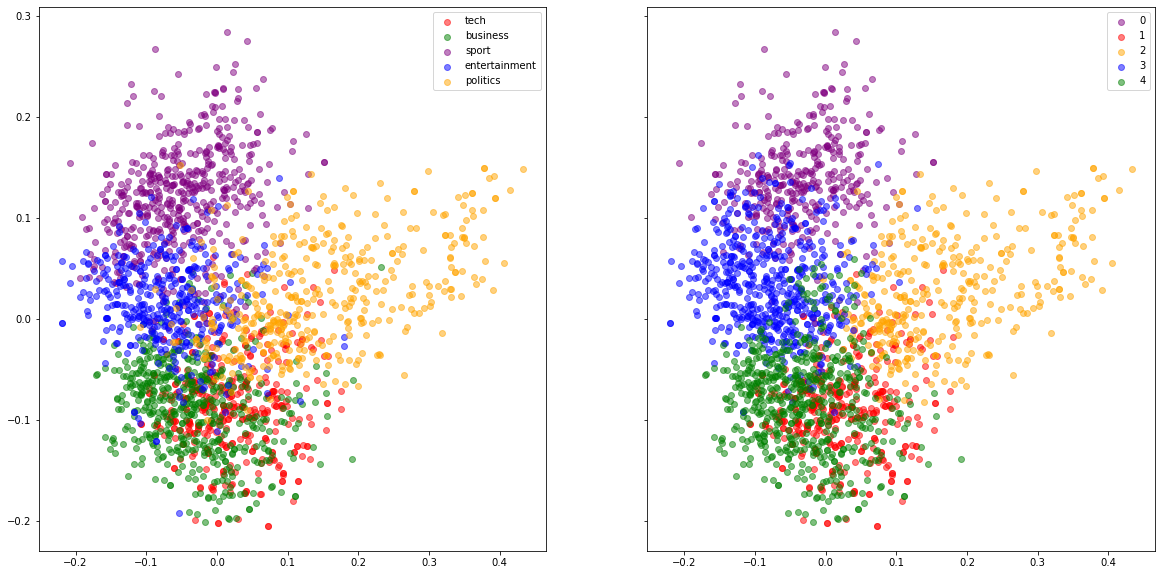

In [14]:
fig, axes = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(20, 10)
colors = ['green','blue', 'orange', 'purple', 'red']
encoded_categories = df['encoded_category'].unique()
for e in encoded_categories:
	mark = df['encoded_category'] == e
	axes[0].scatter(x_pca[:, 0][mark], x_pca[:, 1][mark], color=colors[e], label=le.inverse_transform([e])[0], alpha=0.5)
axes[0].legend()

colors = ['purple', 'red', 'orange', 'blue', 'green']
for e in set(kmeans.labels_):
	mark = kmeans.labels_ == e
	axes[1].scatter(x_pca[:, 0][mark], x_pca[:, 1][mark], color=colors[e], label=e, alpha=0.5)
axes[1].legend()